In [2]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import imutils
import imutils.perspective as persp
import skimage.filters as filters
import scipy.spatial.distance as dist
import cv2
from skimage.measure import find_contours
from skimage.draw import rectangle
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin

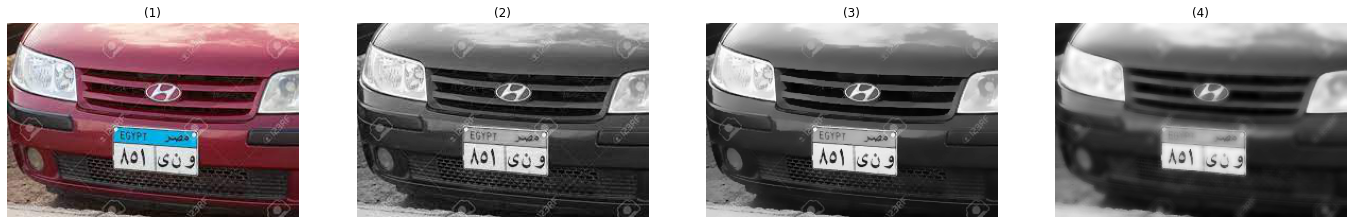

In [195]:
imagesFirst=[]

#reading the car image
car=io.imread('images/pic3.jfif')
imagesFirst.append(car)

#converting image into gray scale
grayCar=cv2.cvtColor(car,cv2.COLOR_BGR2GRAY)
imagesFirst.append(grayCar)

#applying median for reducing noise
car_denoised=cv2.bilateralFilter(grayCar,11,17,17)
imagesFirst.append(car_denoised)

#blurring by bilateral filter
bi = cv2.bilateralFilter(grayCar, 8, 75, 75)
imagesFirst.append(bi)



show_images(imagesFirst)

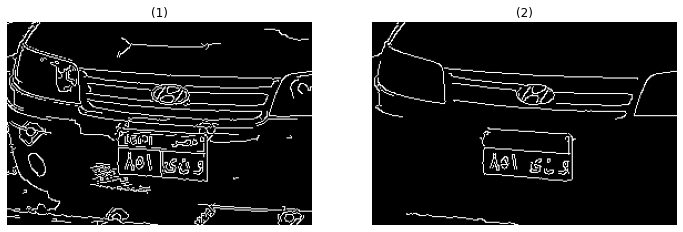

In [205]:
#using Canny edge detector
edges=cv2.Canny(car_denoised, 100,250)

edges_bi=cv2.Canny(bi,100,250)


show_images([edges,edges_bi])

In [207]:
imagesC=[]

keypoints = cv2.findContours(edges_bi.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#chnage to RETR_TREE fro chars details to be detected
keypointsD = cv2.findContours(edges_bi.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

keypoints_bi = cv2.findContours(edges_bi.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contourss_bi=imutils.grab_contours(keypoints_bi)
black_images_bi=np.zeros(car.shape)
cv2.drawContours(black_images_bi,contourss_bi,-1,(0,255,0),2)


contourss=imutils.grab_contours(keypoints)
contourssD=imutils.grab_contours(keypointsD)
print("contours found : ",len(contourss))

contours found :  23


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


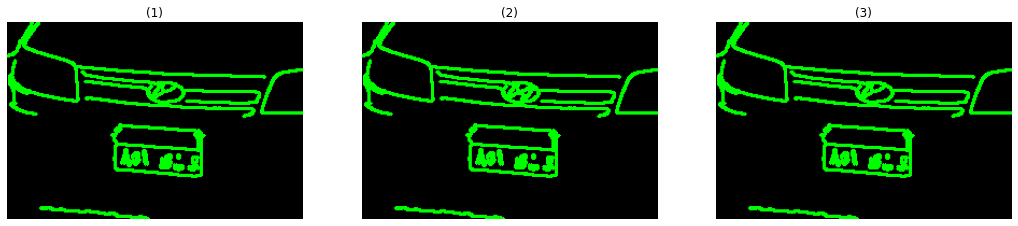

In [208]:
black_images=np.zeros(car.shape)
black_imagesD=np.zeros(car.shape)


cv2.drawContours(black_images,contourss,-1,(0,255,0),2)
cv2.drawContours(black_imagesD,contourssD,-1,(0,255,0),2)

#to sort and get biggest 10 contours
contours=sorted(contourss,key=cv2.contourArea,reverse=True)[:10]


show_images([black_images,black_imagesD,black_images_bi])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


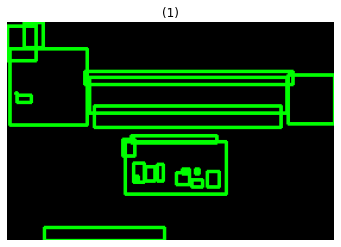

In [209]:
blackImg=np.zeros(car.shape)
for contour in contourss:
    (x,y,w,h) = cv2.boundingRect(contour)
    cv2.rectangle(blackImg, (x,y), (x+w,y+h), (0,255,0), 2)

show_images([blackImg])

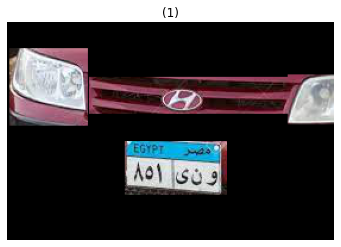

In [210]:
#loop over allshow_images([res_final]) the contour coordinates
mask = np.ones(car.shape[:2], dtype="uint8") * 255
for c in contours:
    # get the bounding rect
    # x,y is the min points of rect & w"width"/h"height"
    x, y, w, h = cv2.boundingRect(c)
    if w*h>1000:#filtering if the rectangel area is above 1000
        cv2.rectangle(mask, (x, y), (x+w, y+h), (0, 0, 255), -1)#drawing the rectangle

res_final = cv2.bitwise_and(car, car, mask=cv2.bitwise_not(mask))

show_images([res_final])

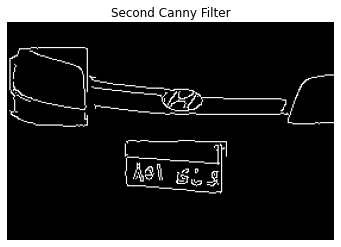

In [211]:
#second stage of filtering
grayCar2=cv2.cvtColor(res_final,cv2.COLOR_BGR2GRAY)
bi2 = cv2.bilateralFilter(grayCar2, 8, 75, 75)

#canny second filter
edges_bi2=cv2.Canny(bi2,100,250)


show_images([edges_bi2],["Second Canny Filter"])

In [212]:
#finding contours second stage
keypoints2 = cv2.findContours(edges_bi2.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contourss_bi2=imutils.grab_contours(keypoints2)

#mask sencond stage
mask = np.ones(car.shape[:2], dtype="uint8") * 255
black_images_bi2=np.zeros(car.shape)
cv2.drawContours(black_images_bi2,contourss_bi2,-1,(0,0,255),2)

#grabbing the founded contours
contourss2=imutils.grab_contours(keypoints2)
print("founded contours : ",len(contourss2))


founded contours :  29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


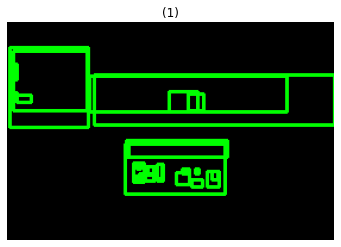

In [213]:
blackImg=np.zeros(car.shape)
for contour in contourss2:
    (x,y,w,h) = cv2.boundingRect(contour)
    cv2.rectangle(blackImg, (x,y), (x+w,y+h), (0,255,0), 2)
    
show_images([blackImg])

PLATE NUMBER DETECTED
1


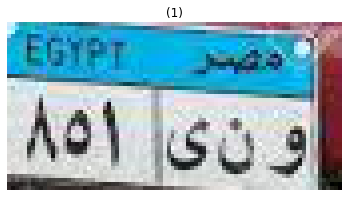

In [214]:
cropped=[]
#filtering rectangles according to rectangles included in it "filter min 5 rectangles"
for contour in contourss2:
    (x,y,w,h) = cv2.boundingRect(contour)
    counter=0
    for inner in contourss2:
        (x2,y2,w2,h2)=cv2.boundingRect(inner)
        if x2!=x and y2!=y:
            xMin=x
            xMax=x+w
            yMin=y
            yMax=y+h
            if xMin<x2 and xMax>x2 and yMin<y2 and yMax>y2:
                counter+=1
    if counter > 8 :
        print("PLATE NUMBER DETECTED")
        cropped_photo=car[x:x+h,y:y+w]
        cropped.append(cropped_photo)
        cv2.rectangle(mask, (x,y), (x+w,y+h), (0,255,0), 2)

print(len(cropped))
#checking that there is only one part detected as a plate number
if len(cropped)>1:
    print("EXCEPTION ---->> more filtering is needed")


show_images(cropped)